In [1]:
import rospy
from sensor_msgs.msg import Image
from cv_bridge import CvBridge
import cv2
from IPython.display import display, clear_output
from PIL import Image as PILImage
import numpy as np

print("[INFO] Imports loaded.")


[INFO] Imports loaded.


In [2]:
class CameraSubscriber:
    def __init__(self, image_topic_in="/camera/color/image_raw",
                       image_topic_out="/camera/color/image_processed"):
        
        self.bridge = CvBridge()
        self.latest_frame = None

        self.image_topic_in = image_topic_in
        self.image_topic_out = image_topic_out

        print(f"[INFO] CameraSubscriber class initialized with:")
        print(f"       input  = {self.image_topic_in}")
        print(f"       output = {self.image_topic_out}")

    def start(self):
        """ROS 노드 초기화 + 구독/퍼블리셔 시작"""
        rospy.init_node('jupyter_camera_sub', anonymous=True)

        self.sub = rospy.Subscriber(self.image_topic_in, Image, self.image_callback)
        self.pub = rospy.Publisher(self.image_topic_out, Image, queue_size=1)

        print(f"[INFO] Subscribing to {self.image_topic_in}")
        print(f"[INFO] Publishing processed image to {self.image_topic_out}")

    def image_callback(self, msg):
        frame = self.bridge.imgmsg_to_cv2(msg, desired_encoding='bgr8')
        self.latest_frame = frame.copy()

        # 표시용 텍스트
        cv2.putText(frame, "OpenCV Processed", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)

        # 퍼블리시
        out_msg = self.bridge.cv2_to_imgmsg(frame, encoding='bgr8')
        self.pub.publish(out_msg)

        # OpenCV 윈도우
        cv2.imshow("Camera - Processed", frame)
        cv2.waitKey(1)

        # Jupyter 출력
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        pil_img = PILImage.fromarray(rgb)
        clear_output(wait=True)
        display(pil_img)


In [3]:
cam = CameraSubscriber()
print("[INFO] CameraSubscriber object created.")


[INFO] CameraSubscriber class initialized with:
       input  = /camera/color/image_raw
       output = /camera/color/image_processed
[INFO] CameraSubscriber object created.


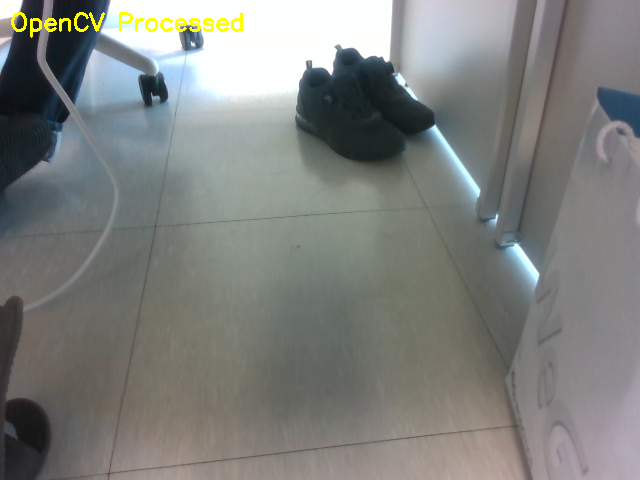

In [ ]:
cam.start()  # ROS 노드 초기화 + 구독 시작

rate = rospy.Rate(5)
print("[INFO] Jupyter Camera Subscriber Started. Waiting for images...")

while not rospy.is_shutdown():
    rate.sleep()

cv2.destroyAllWindows()
